This kernel is going to dive into the details and getting a solid understanding of transformer architecture in 3 components:

- **Positional Encoding**
- **Self_attention mechanism**
- **Multi-head attention mechanism**

I have choosed three concepts above because I personally thought they are the hardest part to grasp the concept.
With my best effort, I hope you will find these explainations are comfortable and useful. 

I hope you will like my work

Thank you,

# <a id = "table_of_content"></a>
# Table of content
[1. Drawback of RNN](#trick1)

[2. LSTM pros & cons](#trick2)

[3. Transformer architecture](#trick3)

[4. Positional encoding ](#trick4)

[5. Self_attention mechanism](#trick5)

[6. Multi-head attention ](#trick6)


<a id = "trick1"></a>
# 1: Drawback of RNN
[Go back to the Table of Contents](#table_of_content)

Before Google releasing the paper " Attention is all you need ", Almost NLP tasks (such as machine translation) were solved by RNN architecture. Although attention is applied already in RNN architecture but still contained some drawbacks: RNN network do not work well in long sentences and  training time to too slow because model have to go through sentences step by step. Transformer is invented as a solution for solving these drawbacks. BERT, GPT-2 invented based on transformer architecture.  You can think of transformer architecture is a kind of architecture where attention mechanism is thoroughly applied to whole encoder & decoder.

To understand transformer better, we should revise some typical features of normal seq2seq using RNN

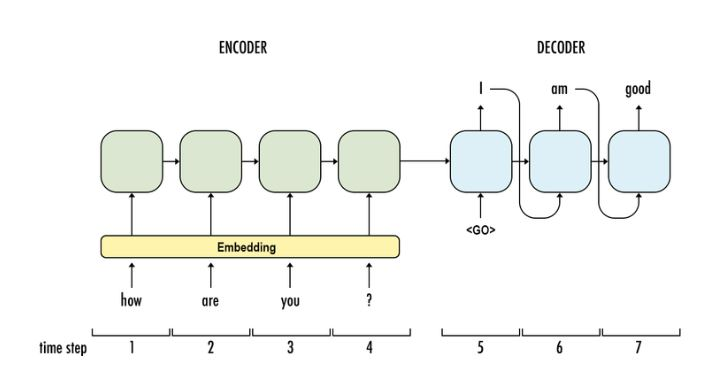

In classical RNN architecture, both encoder & decoder receive input as sequence and loop through whole sentence by time steps. Meaning we have to wait until final times step at encoder to begin feed them to decoder output. This feature do **slow the training speed**.  Although **truncated backpropagation** used to reduce the training time but still do not ultilize the power of parallel processing ( running all in same time) so the speed is still slow.

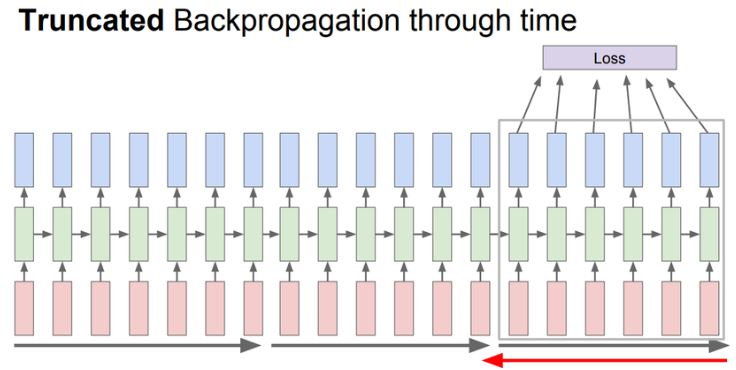

The second drawback of RNN architecture occurs when the input're long sentences. 

Long sentences ==> Long time steps ==> gradients fluctuate more (too small/too big) ==> vanishing/exploding gradients ==> lost/decay information

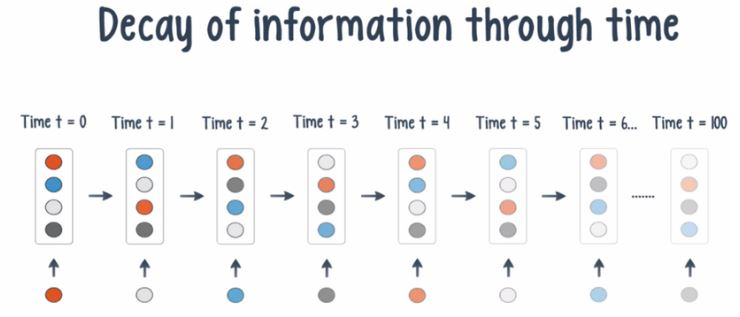

<a id = "trick2"></a>
# 2: LSTM pros & cons
[Go back to the Table of Contents](#table_of_content)

In order to solve the Gradient Vanishing in RNN architecture, Long sort term memory (LSTM) is invented as a solution.
Basically, LSTM have 'C'unit to allow all information go thorough the cell and avoid the decay/lost information during traning, also have forget gate to skip connection to avoid vanish/exploding gradient

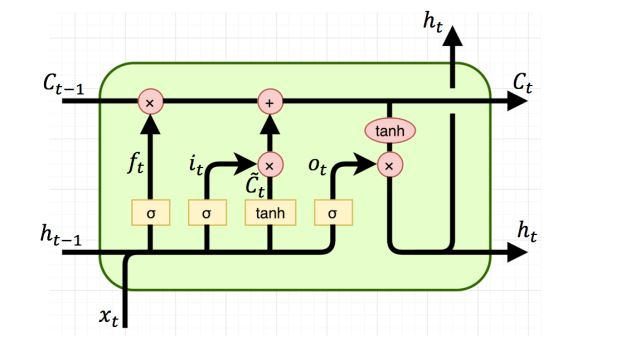

LSTM fixed the drawback of Gradient vanishing, but it own architecture're more complex than RNN and then the training speed is really slow, especially in long sentence

<a id = "trick3"></a>
# 3: Transformer architecture
[Go back to the Table of Contents](#table_of_content)

Transformer architecture resolved 2 things:
* ultilizing the paralell processing on GPU
* Handling drawbacks of long sentence input

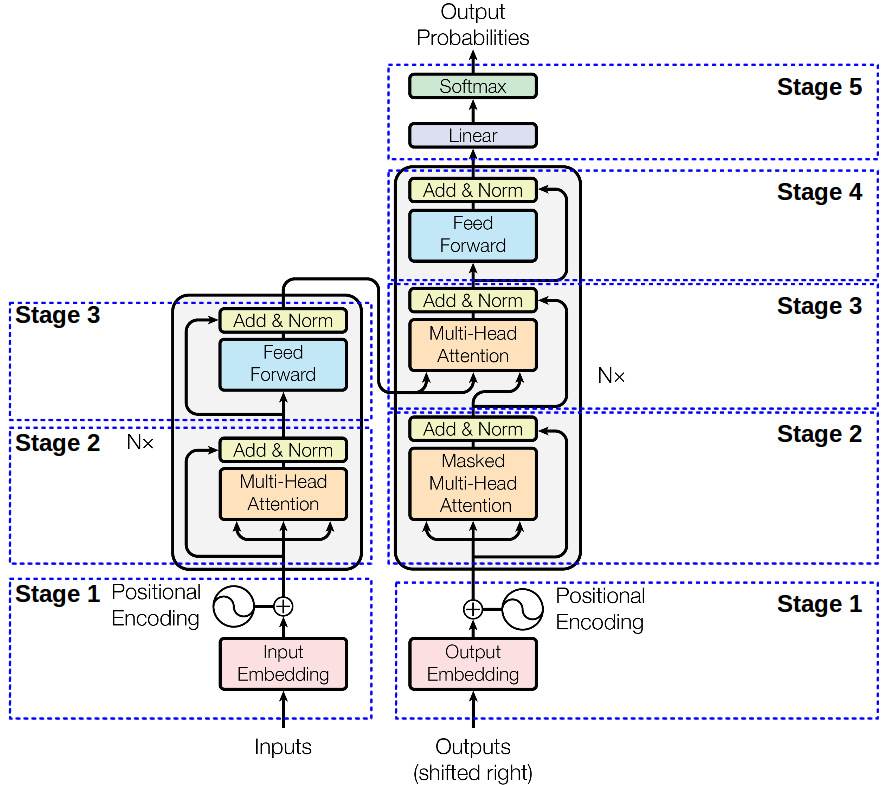

In the paper "attention is all you need", Transformer have two parts : Input ( Encoder) and Output (Decoder). 
The input in transformer is different than input in RNN. In transformer there is no " time step", so the sentence input in transformer would not be 'recurrent'. Every input position is equal, the word didn't ordered anymore and simultaneously feed into parallel process. You might be wonder: How can we do that without recurrence. The answer is positional encoding.

<a id = "trick4"></a>
# 4: Positional encoding
[Go back to the Table of Contents](#table_of_content)

This technique is used because there is no notion of word order (1st word, 2nd word, ..) in the proposed architecture. All words of input sequence are fed to the network with no special order or position (unlike common RNN), thus, model has no idea how the words are ordered. Consequently, a position-dependent signal is added to each word-embedding to help the model incorporate the order of words. This addition not only avoids destroying the embedding information but also adds the vital position information. In the case of RNNs, we feed the words sequentially to RNN, i.e. n-th word is fed at step n, which helps the model incorporate the order of words.


In transformer architecture, each word in a sentence simultaneously flows through the Transformer’s encoder/decoder stack, The model itself doesn’t have any sense of position/order/recurrence for each word. 
But in fact: Position and order of words are the essential parts of any language. They define the grammar and thus the actual semantics of a sentence. Because of this feature, we can naturally understand one thing:  if transformer do not treat all words to be "ordered/recurrent" like RNN, transformer still need to use other technique to make every words in sentence have to be followed by the right position on their own.

One possible solution to give the model some sense of order is to add a piece of information to each word about its position in the sentence. We call this “piece of information”, **the positional encoding**.

Positional encoding created by adding an embedding vector of dimension d_model, a vector of the same size with embedding vector, to each word. This positional encoding vector tell the model about the position of this word within the sentence. Let us first state these vectors.

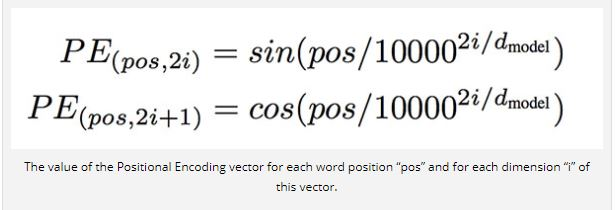

As an example, the positional encoding vector of the word bird in the sentence: "The little bird took its flight" (here we take d_model=300), is:

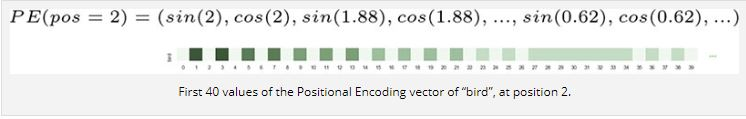

Let explain why we have sin(2), cos(2), sin(1.88), cos(1.88),... in this positional vector: 

 Firstly, This encoding vector illustrated above is used for "bird" which have position  = 2. => pos = 2.
 Secondly, d_model = 300, meaning the dimention vector will range from [0,299],Each dimention will have a pair (sin, cosin) function.
* At the first dimention, i = 0 ---> 2i/d_model = 2*0/300 = 0 ---> PE(pos,2i) = sin(2/10000^0) = sin(2), PE(pos,2i+1) = cos(2/10000^0) = cos(2)
* At the second dimention, i = 1 ---> 2i/d_model = 2*1/300 = 0.0067 ---> PE(pos,2i) = sin(2/10000^0.0067) ~ sin(1.88), PE(pos,2i+1) = cos(1.88)
* .................

If we look at a heatmap of positional encodings of a longer sentence. Each row corresponds to a word and displays the 40 first values of its positional encoding vector

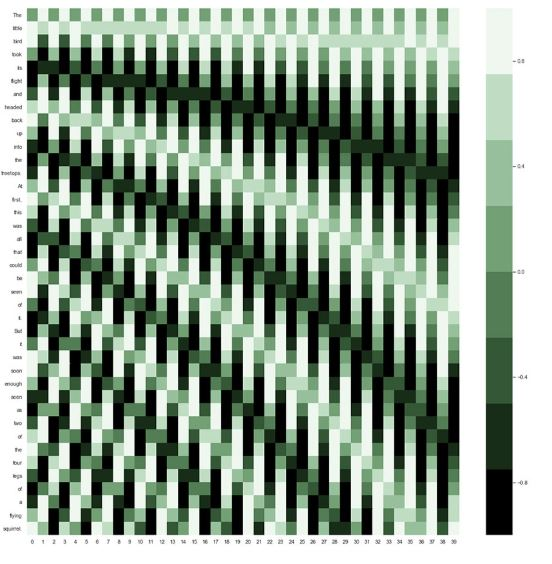

if the distance between two words A and B in a sentence is the same as between words C and D, their positional encoding vectors should reflect that fact

After caculating the positional encoding, we sum the input embedding  and positional encoding to return final embedding input with context infor:  **Embedding_with_context = Input embedding + Positional encoding**

<a id = "trick5"></a>
# 5: Self-attention mechanism
[Go back to the Table of Contents](#table_of_content)

Basically, **Multi_head attention** vector is the concat of **multiple self-attention** vector, So to understand multi-head attention, we will look at self-attention vector fist. 

Self-attention is a sequence-to-sequence transformation, transform a sequence of tokens into a new sequence of tokens. A good representation of a word needs to follow its context within a sentence. The embedding vector W(i) of word i needs to precisely **relate to the words W(1),...,W(i-1) left of i and similarly, words W(i+1),...,W(n) right of i**. Meaning we have to evaluate how relatation of two words in sentence? It naturally come in mind to using their **dot product** 

Self_attention is the way that fully utilizing the power of attention mechanism in sentence. Go in detail with 3 steps:

1. To compute the new representation of **word i**: The embedding W(i) will be used in the dot product with the other wordsW(j)of the sentence to compute the weights for each word.

1. To compute the new representations of the **other words** in the sentence j: The embedding W(i) will be used in the dot product with these words to compute the weights for each word.

1. To compute the **finally** new representation of **word i**: The embedding W(i) will be used as a summand of the final weighted sum.

Instead of learning for each word one single embedding to perform these three tasks, self_attention learn a different word embedding for each task. Going from a general-purpose embedding to three specialized embeddings for each word. Calling the embedding for task 1 the **query**, for task 2 the **key**, and for task 3 the **value.**
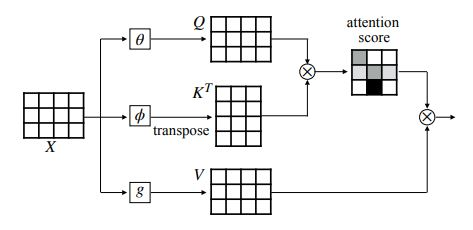

For example: 
Let say we have the sentence: "The little bird took its flight". we want to compute the attention representation of the word “bird”. First, we measure how this word is related to all the other words in the sentence.

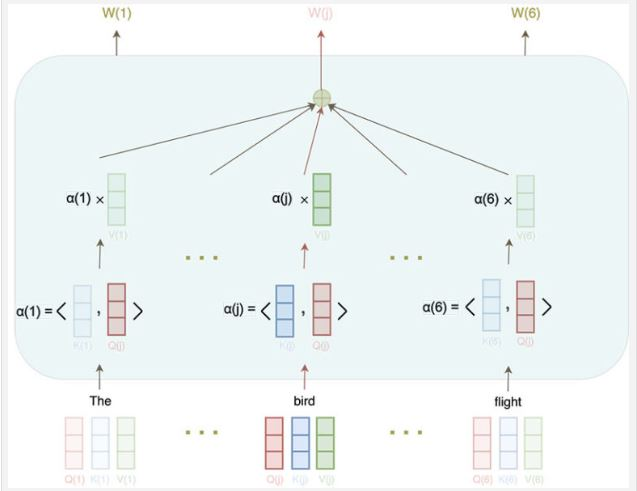

We do this by taking the dot product of its Query vector, Q(bird), with the Key of all the other words, K(the),...,K(flight), yielding a vector of weights for all the words in the sentence: α(the),…,α(flight). We then use these weights in the weighted sum of Value vectors of all the words in the sentence V(the),...,V(nest).
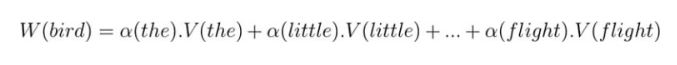

----------
To summarize, we passing the query and key to a mathematical function (usually matrix multiplication followed by softmax). The resulting context vector for Q is the multiplication of the probability vector obtained by the softmax with the Value. When the Query, Key, and Value are all generated from the same input sequence X, it is called Self-Attention.

 
 

<a id = "trick6"></a>
# 6: Multi-head attention
[Go back to the Table of Contents](#table_of_content)

One of the self_attention problem is that the attention of word (x) will pay almost attention score on itself, Such as:  attention for 'bird' will have the highest score for bird' word. And it's obviously reasonable. 

But what we want here is how 'bird' word heavily interact with the other word. So multi - head attention is the solution where we simply combine the knowledge explored by multiple attention (head) or agents instead of doing it by one, as in the traditional case. The words vectors are divided into a fixed number (h, number of heads) of chunks, and then self-attention is applied on the corresponding chunks, resulting in h context vector for each word. The final context vector is obtained by concatenating all those h context vectors and multiply with Wo matrix(weighted matrix). Wo will be tuned during backprob training
 
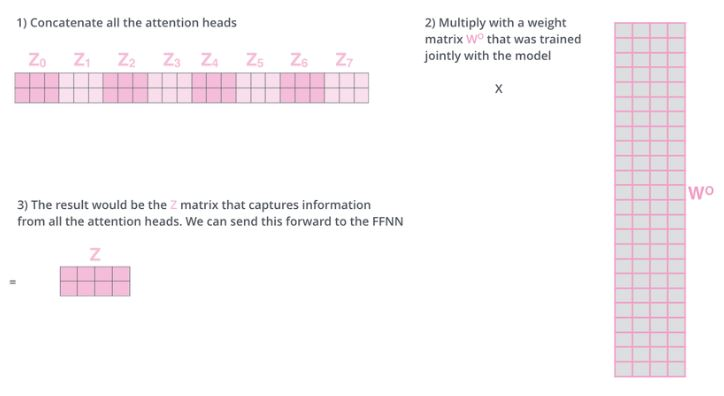

## Reference : 
https://papers.nips.cc/paper/7181-attention-is-all-you-need.pdf

http://jalammar.github.io/illustrated-transformer/  

https://ai.googleblog.com/2017/08/transformer-novel-neural-network.html

https://kazemnejad.com/blog/transformer_architecture_positional_encoding/